## Time series analysis in Python

Quick exploration of Python packages for Fourier, Wavelet and EMD analysis: scipy.fft, PyWavelets and emd.

In [3]:
import pywt
import numpy as np
import pandas as pd
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.gridspec as gridspec

## Fourier analysis

scipy.fft

### Example 1
Sum of two sinusoids with frequences 3 and 7 Hz and equal amplitudes

In [32]:
from scipy.fft import fft, fftfreq

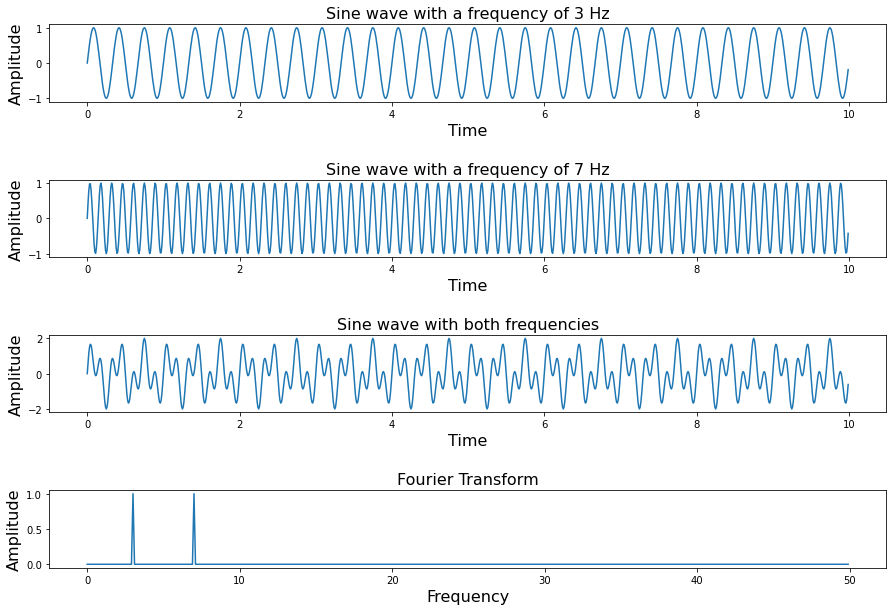

In [107]:
# Number of sample points
N = 1000
# Sample spacing
spacing = 1 / 100;

# Frequencies of 2 sine waves
frequency1 = 3
frequency2 = 7
x = np.linspace(0.0, N * spacing, N, endpoint=False)

# Create two sine waves

wave1 = np.sin(2 * np.pi * frequency1 * x)
wave2 = np.sin(2 * np.pi * frequency2 * x)

figure, axis = plt.subplots(4, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Sine wave with a frequency of 3 Hz', fontsize=16)
axis[0].plot(x, wave1)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

axis[1].set_title('Sine wave with a frequency of 7 Hz', fontsize=16)
axis[1].plot(x, wave2)
axis[1].set_xlabel('Time', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

# Add the sine waves

wave = wave1 + wave2


axis[2].set_title('Sine wave with both frequencies', fontsize=16)
axis[2].plot(x, wave)
axis[2].set_xlabel('Time', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)

 

# Fourier

fourierTransform = fft(wave)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[3].set_title('Fourier Transform', fontsize=16)
axis[3].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[3].set_xlabel('Frequency', fontsize=16)
axis[3].set_ylabel('Amplitude', fontsize=16)

plt.show()

In this graph there are pronounced peaks with ampitude 1 at frequencies 3 and 7

### Example 2
Sum of two sinusoids with frequences 3 and 7 Hz and amplitudes 0.5 and 1 respectively

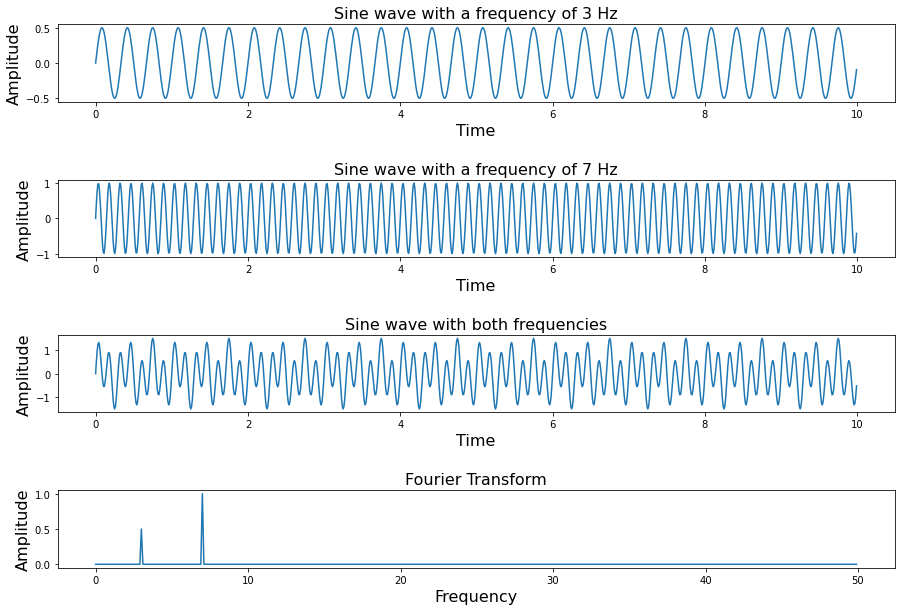

In [272]:
# Number of sample points
N = 1000
# Sample spacing
spacing = 1 / 100;

# Frequencies of 2 sine waves
frequency1 = 3
frequency2 = 7
x = np.linspace(0.0, N * spacing, N, endpoint=False)

# Create two sine waves

wave1 = 0.5 * np.sin(2 * np.pi * frequency1 * x)
wave2 = np.sin(2 * np.pi * frequency2 * x)

figure, axis = plt.subplots(4, 1, figsize=(15, 10))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Sine wave with a frequency of 3 Hz', fontsize=16)
axis[0].plot(x, wave1)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

axis[1].set_title('Sine wave with a frequency of 7 Hz', fontsize=16)
axis[1].plot(x, wave2)
axis[1].set_xlabel('Time', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

# Add the sine waves

wave = wave1 + wave2


axis[2].set_title('Sine wave with both frequencies', fontsize=16)
axis[2].plot(x, wave)
axis[2].set_xlabel('Time', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)

 

# Fourier

fourierTransform = fft(wave)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[3].set_title('Fourier Transform', fontsize=16)
axis[3].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[3].set_xlabel('Frequency', fontsize=16)
axis[3].set_ylabel('Amplitude', fontsize=16)

plt.show()

In this graph amplitude at frequency 3 equals 0.5

### Example 3
Sum of two sinusoids with frequences 3 and 7 Hz and equal amplitudes with randomised noise

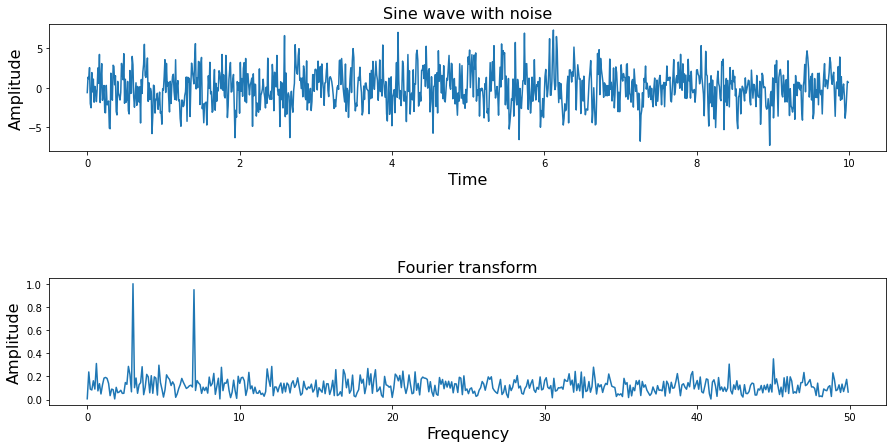

In [108]:
N = 1000
spacing = 1 / 100;

x = np.linspace(0.0, N * spacing, N, endpoint=False)
wave2 = wave + np.random.normal(0, 2, x.shape)

figure, axis = plt.subplots(2, 1, figsize=(15, 7))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Sine wave with noise', fontsize=16)
axis[0].plot(x, wave2)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(wave2)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[1].set_title('Fourier transform', fontsize=16)
axis[1].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[1].set_xlabel('Frequency', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

plt.show()

Despite significant noise both frequencies are pronounced

### Example 4
Periodic rectangular signal with period $2\pi$

In [98]:
from scipy import signal

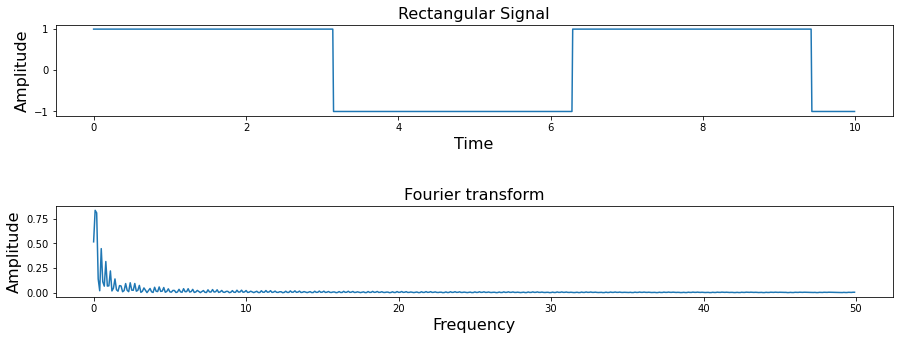

In [106]:
N = 1000
spacing = 1 / 100;

x = np.linspace(0.0, N * spacing, N, endpoint=False)
f1 = signal.square(x)

figure, axis = plt.subplots(2, 1, figsize=(15, 5))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Rectangular Signal', fontsize=16)
axis[0].plot(x, f1)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(f1)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[1].set_title('Fourier transform', fontsize=16)
axis[1].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[1].set_xlabel('Frequency', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

plt.show()

### Example 5

Sum of a periodic rectangular signal with period $2\pi$ and a sinusoid with amplitude 0.25 and frequency 5 Hz

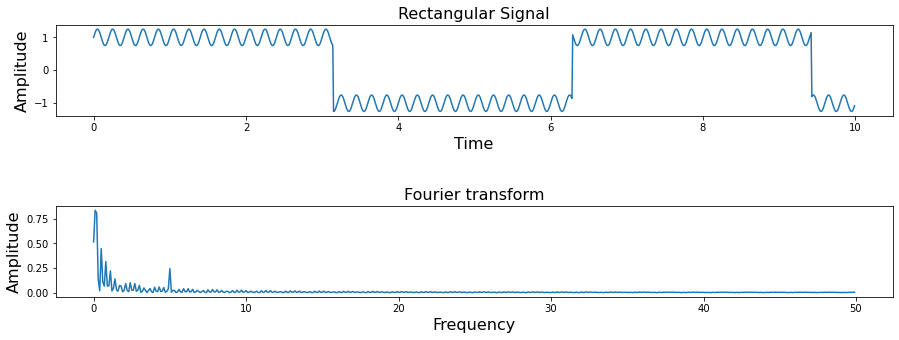

In [275]:
from scipy import signal
N = 1000
spacing = 1 / 100;

x = np.linspace(0.0, N * spacing, N, endpoint=False)
f1 = signal.square(x) + 0.25 * np.sin(2 * np.pi * 5 * x)

figure, axis = plt.subplots(2, 1, figsize=(15, 5))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Rectangular Signal', fontsize=16)
axis[0].plot(x, f1)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(f1)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[1].set_title('Fourier transform', fontsize=16)
axis[1].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[1].set_xlabel('Frequency', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

plt.show()

In this graph a sinusoid is visible as a peak of amplitude 0.25 at frequency 5

### Example 6

Application of Fourier transform to a signal of increasing frequency

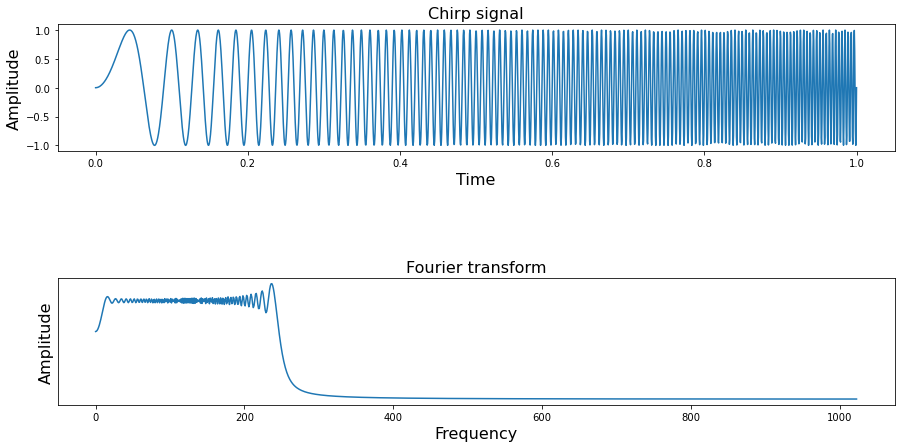

In [423]:
time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)

N = len(chirp_signal)
spacing = time[1] - time[0]

figure, axis = plt.subplots(2, 1, figsize=(15, 7))
plt.subplots_adjust(hspace=1)

axis[0].set_title('Chirp signal', fontsize=16)
axis[0].plot(time, chirp_signal)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(chirp_signal)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[1].set_title('Fourier transform', fontsize=16)
axis[1].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[1].set_xlabel('Frequency', fontsize=16)
axis[1].set_yticks([])
axis[1].set_ylabel('Amplitude', fontsize=16)

plt.show()

Application of Fourier transform to both halves of this signal separately

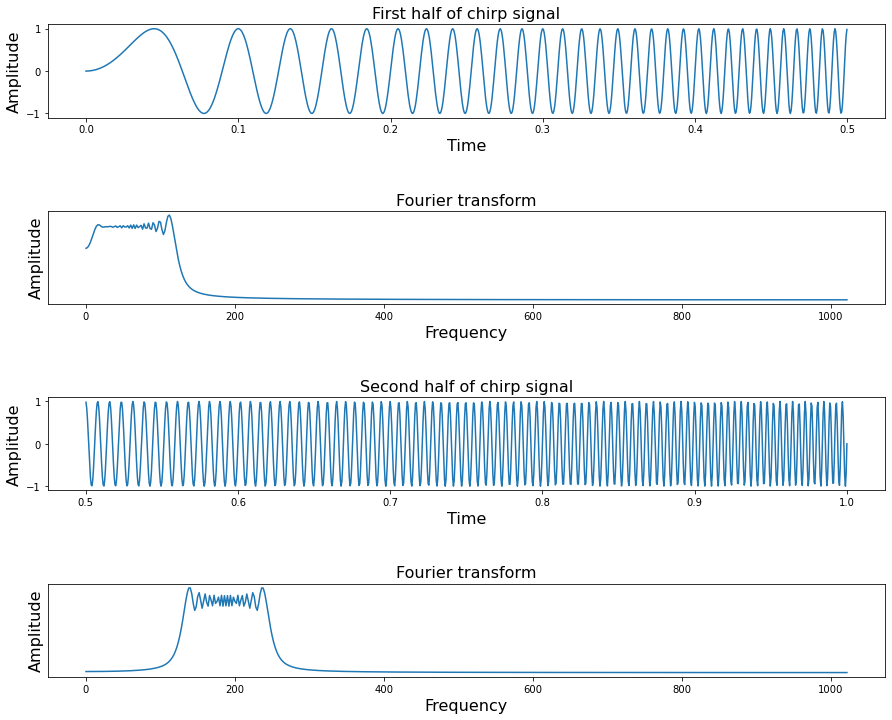

In [433]:
time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)

splt = len(time) // 2

time1 = time[:splt]
time2 = time[splt:]

chirp_signal1 = chirp_signal[:splt]
chirp_signal2 = chirp_signal[splt:]

figure, axis = plt.subplots(4, 1, figsize=(15, 12))
plt.subplots_adjust(hspace=1)

N = len(chirp_signal1)
spacing = time1[1] - time1[0]

axis[0].set_title('First half of chirp signal', fontsize=16)
axis[0].plot(time1, chirp_signal1)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(chirp_signal1)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[1].set_title('Fourier transform', fontsize=16)
axis[1].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[1].set_xlabel('Frequency', fontsize=16)
axis[1].set_yticks([])
axis[1].set_ylabel('Amplitude', fontsize=16)

N = len(chirp_signal2)
spacing = time2[1] - time2[0]

axis[2].set_title('Second half of chirp signal', fontsize=16)
axis[2].plot(time2, chirp_signal2)
axis[2].set_xlabel('Time', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(chirp_signal2)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[3].set_title('Fourier transform', fontsize=16)
axis[3].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[3].set_xlabel('Frequency', fontsize=16)
axis[3].set_yticks([])
axis[3].set_ylabel('Amplitude', fontsize=16)

plt.show()

### Example 7

Application of Fourier transform to real data of seasonal changes in the temperature of upper layer of the equatorial part of the Pacific Ocean from a database used to study El Nino phenomenon

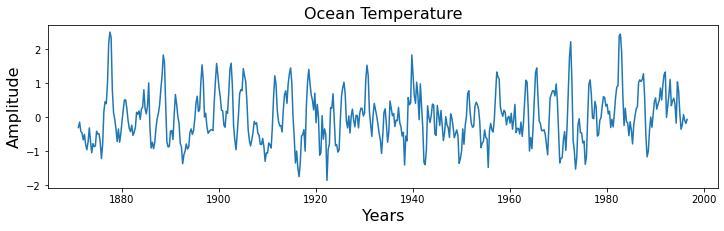

In [276]:
data = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"
el_nino = pd.read_table(data)
N = el_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = el_nino.values.squeeze()

figure, axis = plt.subplots(figsize=(12,3))
axis.plot(time, signal, label='signal')
axis.set_ylabel('Amplitude', fontsize=16)
axis.set_xlabel('Years', fontsize=16)
axis.set_title('Ocean Temperature', fontsize=16)
plt.show()

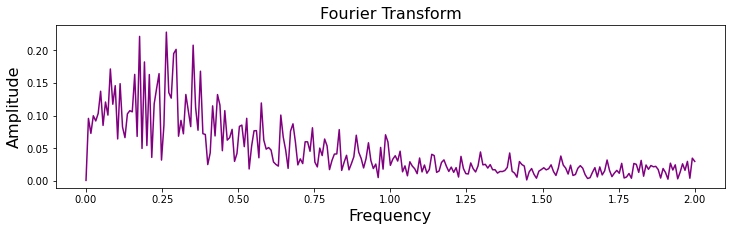

In [277]:
figure, axis = plt.subplots(figsize=(12,3))
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis.plot(freqs, fft_values, 'purple')
axis.set_xlabel('Frequency', fontsize=16)
axis.set_ylabel('Amplitude', fontsize=16)
axis.set_title('Fourier Transform', fontsize=16)
plt.show()

## Wavelet

Pywavelets package was used for Wavelet analysis

In [338]:
import pywt

Wavelets have many practical applications. For example, they can be used to remove noise from a signal.

### Example 8

Reconstruction of a signal - sum of two sinusoids with frequences 3 and 7 Hz and equal amplitudes with randomised noise - using functions from the package. Application of Fourier transform to the resulting signal to compare the frequencies to the original ones.

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pywt/_dwt.py:173: DeprecationWarning: per has been renamed to periodization and will be unavailable in a future version of pywt.
  mode = Modes.from_object(mode)


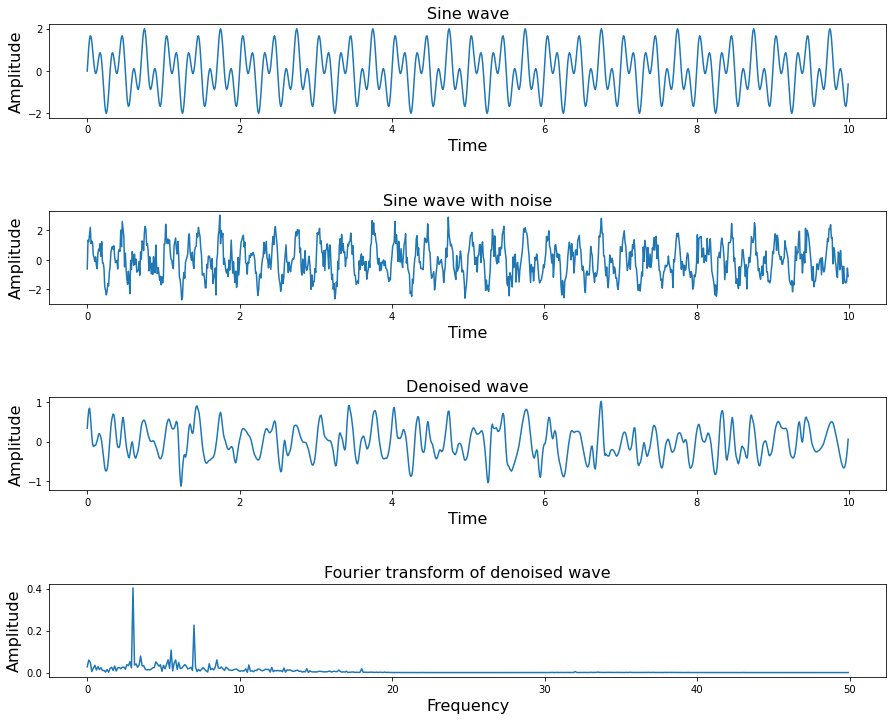

In [352]:
def denoise(signal, thresh = 0.63, wavelet="db6"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

N = 1000
spacing = 1 / 100
frequency1 = 3
frequency2 = 7
x = np.linspace(0.0, N * spacing, N, endpoint=False)

wave1 = np.sin(2 * np.pi * frequency1 * x)
wave2 = np.sin(2 * np.pi * frequency2 * x)
wave = wave1 + wave2
wave2 = wave + np.random.normal(0, 0.5, x.shape)

figure, axis = plt.subplots(4, 1, figsize=(15, 12))
plt.subplots_adjust(hspace=1.0)

axis[0].set_title('Sine wave', fontsize=16)
axis[0].plot(x, wave)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

axis[1].set_title('Sine wave with noise', fontsize=16)
axis[1].plot(x, wave2)
axis[1].set_xlabel('Time', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

new_wave = denoise(wave2)

axis[2].set_title('Denoised wave', fontsize=16)
axis[2].plot(x, new_wave)
axis[2].set_xlabel('Time', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(new_wave)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[3].set_title('Fourier transform of denoised wave', fontsize=16)
axis[3].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[3].set_xlabel('Frequency', fontsize=16)
axis[3].set_ylabel('Amplitude', fontsize=16)

plt.show()

There are two distinct peaks at frequencies 3 and 7 Hz, but their amplitudes are different from the original ones. Moreover, small peaks appeared at frequencies not present in the original signal. The new signal did not retain all qualities of the original, but high-frequency noise disappeared.


The graph below depicts the mother wavelet used in this transformation.

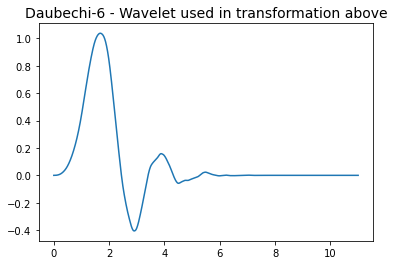

In [439]:
wavelet = pywt.Wavelet('db6')
w = wavelet.wavefun()
wavelet_function = w[0]
x_values = w[-1]
plt.plot(x_values, wavelet_function)
plt.title('Daubechi-6 - Wavelet used in transformation above', fontsize=14)
plt.show()

Wavelets can also be used for image compression.

### Example 9

Compression of an image using Wavelet transform.

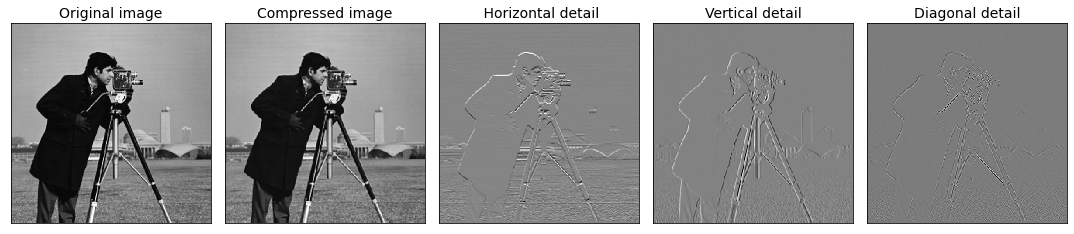

In [356]:
original = pywt.data.camera()
# Wavelet transform of image using biorthogonal wavelet
titles = ['Original image', 'Compressed image', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(18, 4))
for i, a in enumerate([pywt.data.camera(), LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 6, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])
fig.tight_layout()
plt.show()

The resulting photo has lower quality, but no radical change happened. Images that depict the details obtained during the transformation accurately show borders of all the main objects in the photograph.

The mother Wavelet used in this transformation is shown in the graph below. It is different from the one used to remove noise from a function.

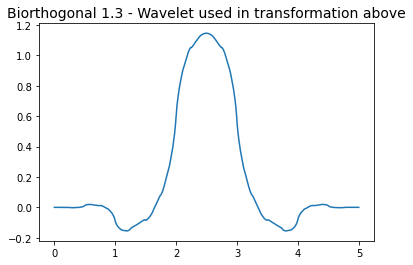

In [440]:
wavelet = pywt.Wavelet('bior1.3')
w = wavelet.wavefun()
wavelet_function = w[0]
x_values = w[-1]
plt.plot(x_values, wavelet_function)
plt.title('Biorthogonal 1.3 - Wavelet used in transformation above', fontsize=14)
plt.show()

При использовании Вейвлет-преобразования многое зависит от правильного выбора базовой функции.

### Пример 10

Применим к ряду с шумом преобразование с той базовой функцией, которая использовалась при сжатии картинки и снова проверим с помощью преобразования Фурье.

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pywt/_dwt.py:173: DeprecationWarning: per has been renamed to periodization and will be unavailable in a future version of pywt.
  mode = Modes.from_object(mode)


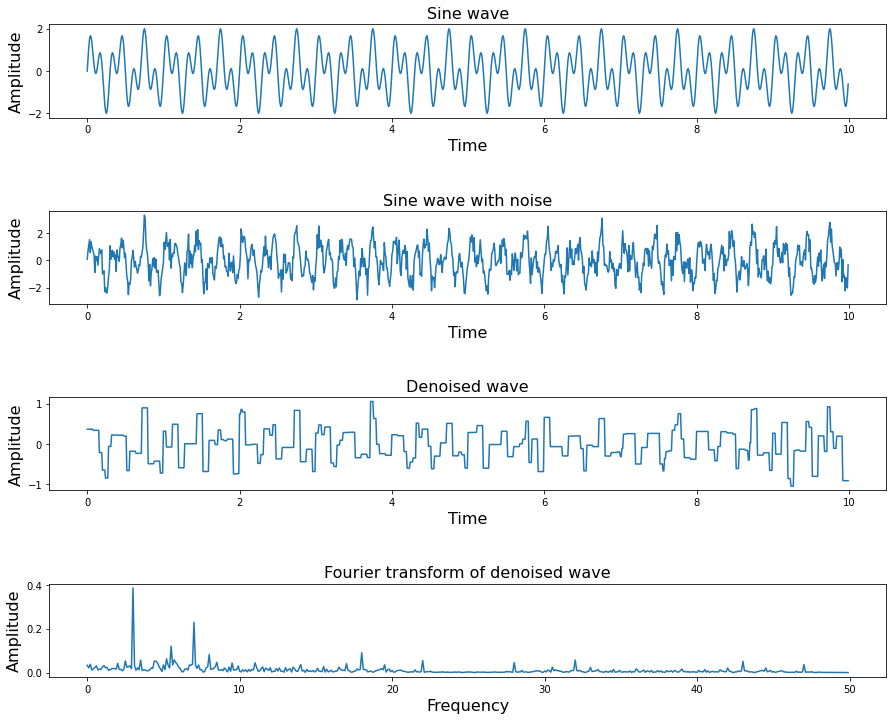

In [360]:
def denoise(signal, thresh = 0.63, wavelet="bior1.3"):
    thresh = thresh*np.nanmax(signal)
    coeff = pywt.wavedec(signal, wavelet, mode="per" )
    coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
    reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
    return reconstructed_signal

figure, axis = plt.subplots(4, 1, figsize=(15, 12))
plt.subplots_adjust(hspace=1.0)

axis[0].set_title('Sine wave', fontsize=16)
axis[0].plot(x, wave)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

axis[1].set_title('Sine wave with noise', fontsize=16)
axis[1].plot(x, wave2)
axis[1].set_xlabel('Time', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

new_wave = denoise(wave2)

axis[2].set_title('Denoised wave', fontsize=16)
axis[2].plot(x, new_wave)
axis[2].set_xlabel('Time', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)

fourierTransform = fft(new_wave)
frequencies = fftfreq(N, spacing)[: N // 2]

axis[3].set_title('Fourier transform of denoised wave', fontsize=16)
axis[3].plot(frequencies, 2.0 / N * np.abs(fourierTransform[0 : N // 2]))
axis[3].set_xlabel('Frequency', fontsize=16)
axis[3].set_ylabel('Amplitude', fontsize=16)

plt.show()

The resulting signals looks very different both from the sum of sinusoids and from the function obtained using a dfferent mother wavelet, but the two main peaks at frequencies 3 and 7 Hz are the same here as in the previous transformation. 

***

Let's visualise how discrete wavelet transform (DWT) works. The original signal is transformed as a result of repeated application of a "filter". This "filter" divides the signal into two components: low-frequency (approximation coefficients) and high-frequency (detail coefficients). At each step the low-frequency component is divided in two.

### Example 11

First 5 levels of discrete wavelet transform applied to a signal the frequency of which is increasing with time.

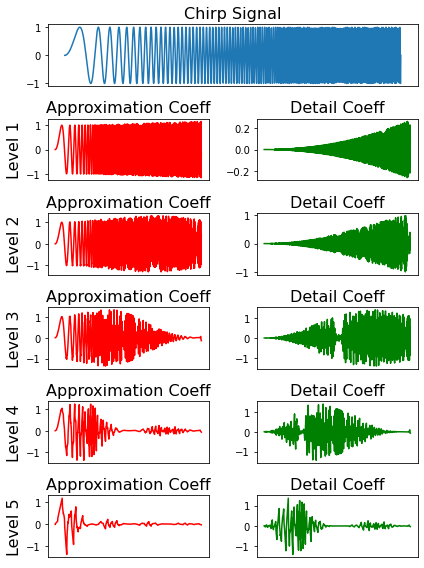

In [362]:
fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=6)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b],[ax5a, ax5b]])

time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(250 * np.pi * time**2)


# First we reconstruct a signal using pywt.wavedec()
coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)

# pywt.wavedec() returns a list of coefficients
[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5

approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]


# By reconstrucing the signal back from only one set of coefficients, we can see how 
# the frequency-sub band for that specific set of coefficient looks like
rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db2', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db2', 'smooth')


ax0.set_title("Chirp Signal", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')

for ii in range(0,5):
    axarr[ii,0].set_xticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

With each level the signal contains less high frequencies.


Let's check if we'll get the original signal after we add level 5 approximation coefficients to the sum of all five detain coefficients.

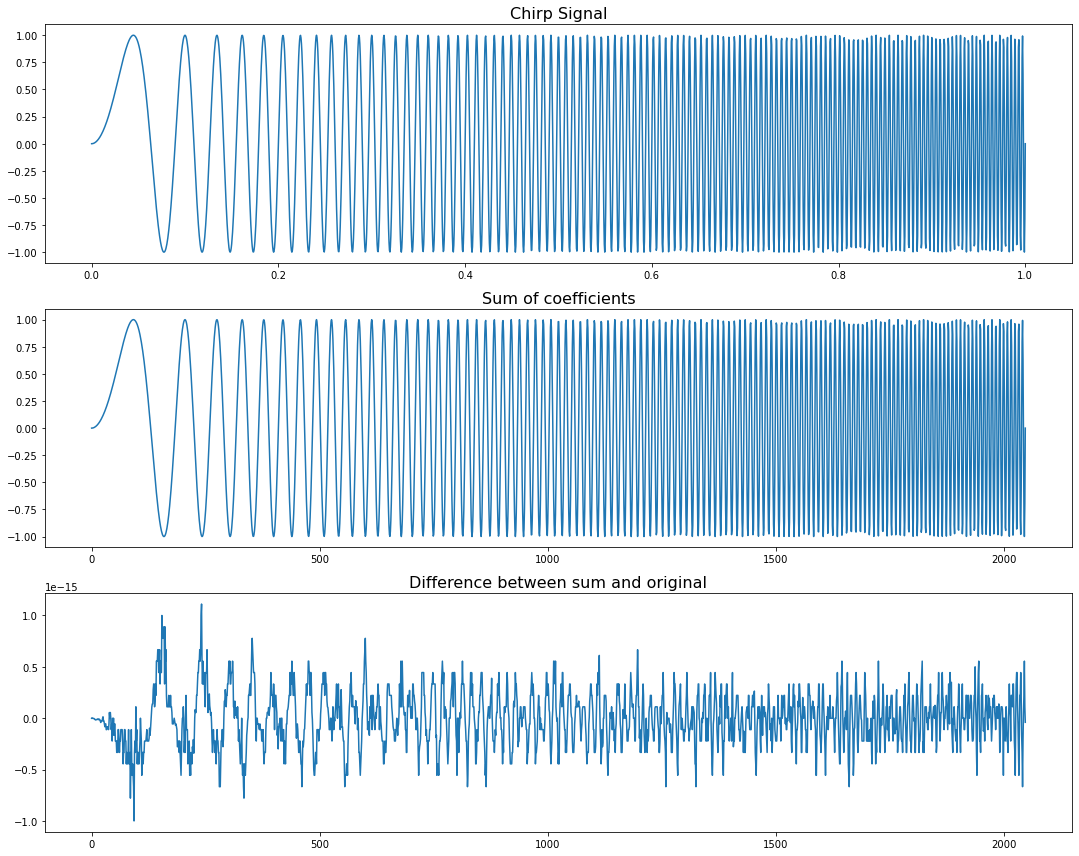

In [368]:
figure, axis = plt.subplots(3, 1, figsize=(15, 12))
plt.subplots_adjust(hspace=1.0)

axis[0].set_title('Chirp Signal', fontsize=16)
axis[0].plot(time, chirp_signal)

signal_sum = rec_signal_cA_level5[:2048] + rec_signal_cD_level1[:2048] + \
rec_signal_cD_level2[:2048] + rec_signal_cD_level3[:2048] + \
rec_signal_cD_level4[:2048] + rec_signal_cD_level5[:2048]

axis[1].set_title('Sum of coefficients', fontsize=16)
axis[1].plot(signal_sum)

axis[2].set_title('Difference between sum and original', fontsize=16)
axis[2].plot(chirp_signal - signal_sum)
plt.tight_layout()
plt.show()

The scale of difference between the original signal and the sum is 1e-15. It means that the are equal with high degree of accuracy, and as the signal is filtered, almost no information is lost.

### Example 12

Let's visualise two-level DWT applied to the sum of sinusoids with frequencies 3 and 7 Hz.

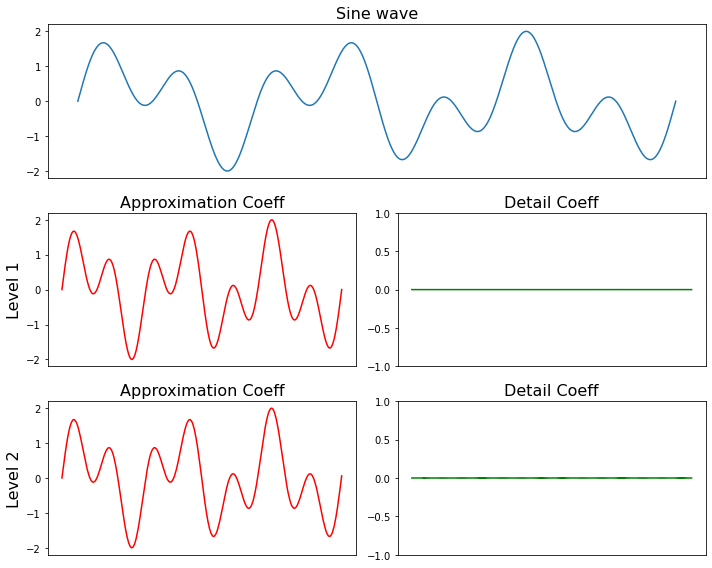

In [369]:
fig = plt.figure(figsize=(10,8))
spec = gridspec.GridSpec(ncols=2, nrows=3)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b]])

time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(2 * np.pi * 3 * time) + np.sin(2 * np.pi * 7 * time)

coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)

[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2

approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

ax0.set_title("Sine wave", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')

for ii in range(0,2):
    axarr[ii,0].set_xticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,1].set_ylim([-1, 1])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

As both frequencies are low enough, the whole signal remained in the low-frequency part after filtration and no detail coefficients were found.

### Example 13

Now the original signal is a sum of four sinusoids with frequencies 0.1, 0.25, 1 and 10 Hz

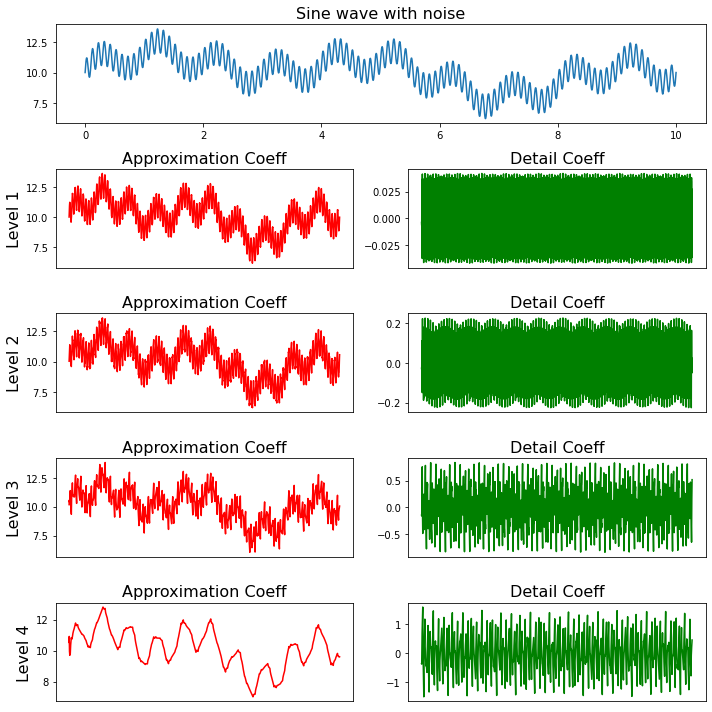

In [321]:
fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(ncols=2, nrows=5)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b]])

time = np.linspace(0, 10, num=2048)
chirp_signal = 10 + np.sin(2 * np.pi * 0.1 * time) + np.sin(2 * np.pi * 0.25 * time) + \
np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 10 * time)


coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)

[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4

approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]


rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')


ax0.set_title("Sine wave with noise", fontsize=16)
ax0.plot(time, chirp_signal)
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')

for ii in range(0,4):
    axarr[ii,0].set_xticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

Approximation coefficients at fourth level are a sum of sinusoids with the first three frequencies: 0.1, 0.25 and 1 Hz

Let's see which frequencies are present in detail coefficients at levels 3 and 4 by applying Fourier transform to their sum.

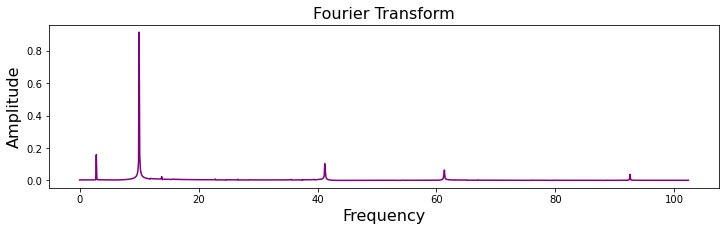

In [322]:
signal = rec_signal_cD_level3 + rec_signal_cD_level4
N = len(time)
dt = time[1]-time[0]
figure, axis = plt.subplots(figsize=(12,3))
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis.plot(freqs, fft_values, 'purple')
axis.set_xlabel('Frequency', fontsize=16)
axis.set_ylabel('Amplitude', fontsize=16)
axis.set_title('Fourier Transform', fontsize=16)
plt.show()

The most pronounced frequency in the sum of detail coefficients is 10 Hz - same as the highest frequency in the original signal with appriximately the same amplitude.

### Example 14

Visualisation of the first levels of DWT applied to the sum of sinusoids with frequencies 3 and 7 Hz and randomised noise.

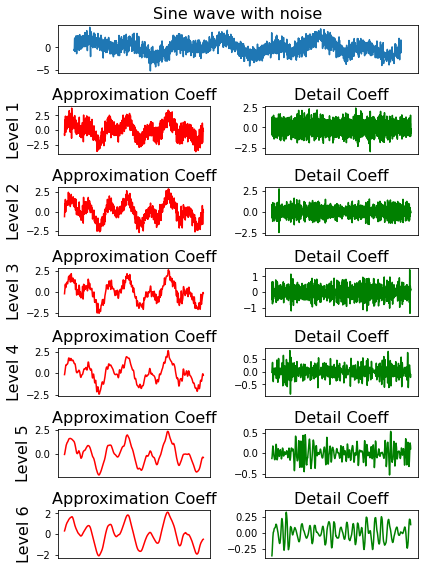

In [384]:
fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=7)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
ax6a = fig.add_subplot(spec[6, 0])
ax6b = fig.add_subplot(spec[6, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],\
                  [ax4a, ax4b],[ax5a, ax5b],[ax6a, ax6b]])

time = np.linspace(0, 1, num=2048)
chirp_signal = np.sin(2 * np.pi * 3 * time) + np.sin(2 * np.pi * 7 * time) + \
np.random.normal(0, 1, time.shape)

coefficients_level1 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=5)
coefficients_level6 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=6)


[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5
[cA6_l6, cD6_l6, cD5_l6, cD4_l6, cD3_l6, cD2_l6, cD1_l6] = coefficients_level6


approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]

approx_coeff_level6_only = [cA6_l6, None, None, None, None, None, None]
detail_coeff_level6_only = [None, cD6_l6, None, None, None, None, None]


rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db5', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db5', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db5', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db5', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db5', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db5', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db5', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db5', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db5', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db5', 'smooth')

rec_signal_cA_level6 = pywt.waverec(approx_coeff_level6_only, 'db5', 'smooth')
rec_signal_cD_level6 = pywt.waverec(detail_coeff_level6_only, 'db5', 'smooth')


ax0.set_title("Sine wave with noise", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')
ax6a.plot(rec_signal_cA_level6, color='red')
ax6b.plot(rec_signal_cD_level6, color='green')

for ii in range(0,6):
    axarr[ii,0].set_xticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

Approximation coeffitients at level 6 are almost equal to the original signal - sum of sinusoids with no noise.

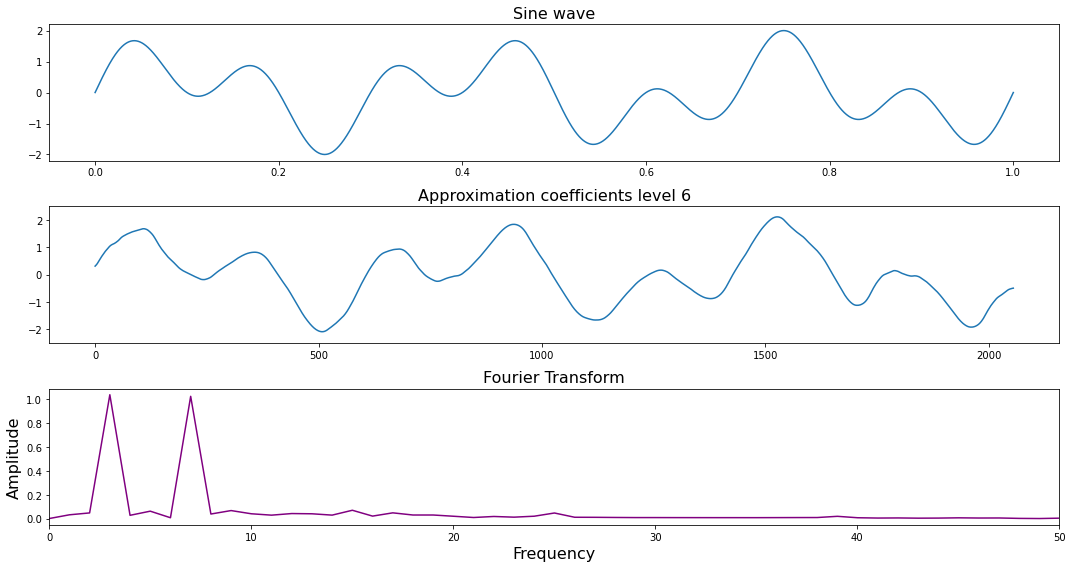

In [385]:
figure, axis = plt.subplots(3, 1, figsize=(15, 8))
plt.subplots_adjust(hspace=1.0)

wave0 = np.sin(2 * np.pi * 3 * time) + np.sin(2 * np.pi * 7 * time)

axis[0].set_title('Sine wave', fontsize=16)
axis[0].plot(time, wave0)

signal = rec_signal_cA_level6

axis[1].set_title('Approximation coefficients level 6', fontsize=16)
axis[1].plot(signal)
axis[1].set_ylim([-2.5, 2.5])

N = len(time)
dt = time[1]-time[0]
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis[2].plot(freqs, fft_values, 'purple')
axis[2].set_xlabel('Frequency', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)
axis[2].set_xlim([0, 50])
axis[2].set_title('Fourier Transform', fontsize=16)

plt.tight_layout()
plt.show()

Let's try to use another mother wavelet - also one from the Daubechi wavelet family, but with a diferent number.

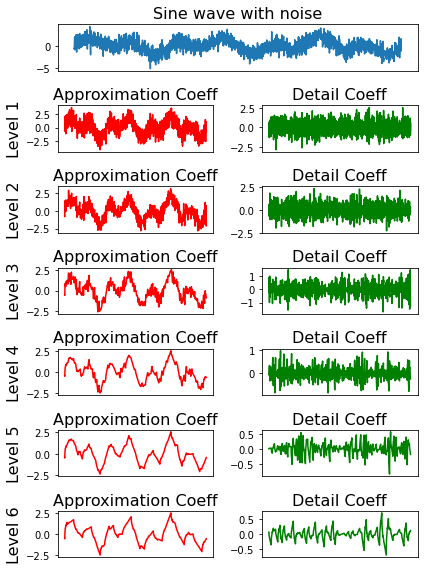

In [386]:
fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=7)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
ax5a = fig.add_subplot(spec[5, 0])
ax5b = fig.add_subplot(spec[5, 1])
ax6a = fig.add_subplot(spec[6, 0])
ax6b = fig.add_subplot(spec[6, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],\
                  [ax4a, ax4b],[ax5a, ax5b],[ax6a, ax6b]])

time = np.linspace(0, 1, num=2048)

coefficients_level1 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=4)
coefficients_level5 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=5)
coefficients_level6 = pywt.wavedec(chirp_signal, 'db2', 'smooth', level=6)


[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4
[cA5_l5, cD5_l5, cD4_l5, cD3_l5, cD2_l5, cD1_l5] = coefficients_level5
[cA6_l6, cD6_l6, cD5_l6, cD4_l6, cD3_l6, cD2_l6, cD1_l6] = coefficients_level6


approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]

approx_coeff_level5_only = [cA5_l5, None, None, None, None, None]
detail_coeff_level5_only = [None, cD5_l5, None, None, None, None]

approx_coeff_level6_only = [cA6_l6, None, None, None, None, None, None]
detail_coeff_level6_only = [None, cD6_l6, None, None, None, None, None]


rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db2', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db2', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db2', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db2', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db2', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db2', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db2', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db2', 'smooth')

rec_signal_cA_level5 = pywt.waverec(approx_coeff_level5_only, 'db2', 'smooth')
rec_signal_cD_level5 = pywt.waverec(detail_coeff_level5_only, 'db2', 'smooth')

rec_signal_cA_level6 = pywt.waverec(approx_coeff_level6_only, 'db2', 'smooth')
rec_signal_cD_level6 = pywt.waverec(detail_coeff_level6_only, 'db2', 'smooth')


ax0.set_title("Sine wave with noise", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')
ax5a.plot(rec_signal_cA_level5, color='red')
ax5b.plot(rec_signal_cD_level5, color='green')
ax6a.plot(rec_signal_cA_level6, color='red')
ax6b.plot(rec_signal_cD_level6, color='green')

for ii in range(0,6):
    axarr[ii,0].set_xticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

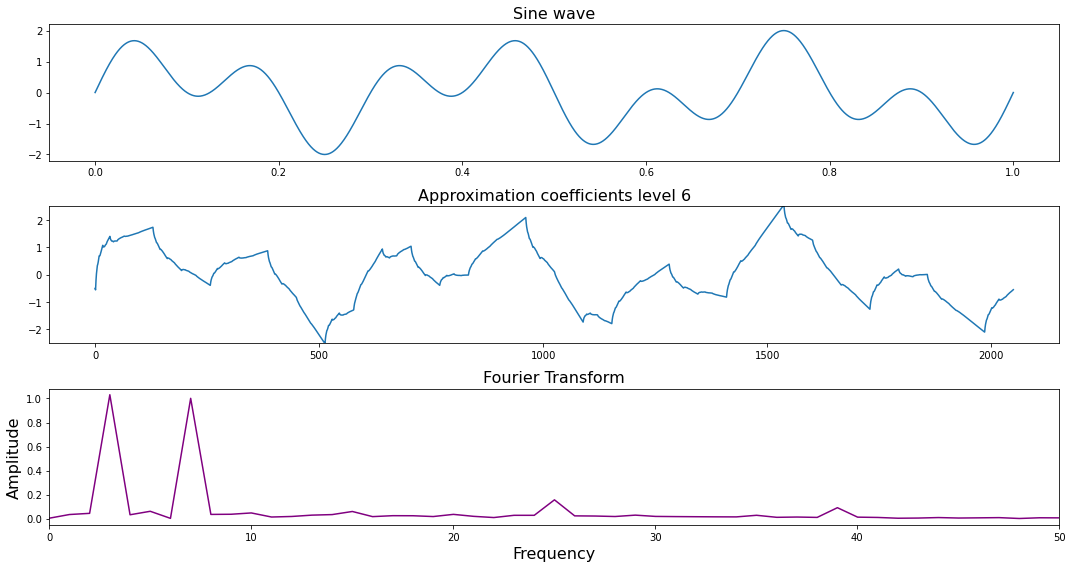

In [387]:
figure, axis = plt.subplots(3, 1, figsize=(15, 8))
plt.subplots_adjust(hspace=1.0)

wave0 = np.sin(2 * np.pi * 3 * time) + np.sin(2 * np.pi * 7 * time)

axis[0].set_title('Sine wave', fontsize=16)
axis[0].plot(time, wave0)

signal = rec_signal_cA_level6

axis[1].set_title('Approximation coefficients level 6', fontsize=16)
axis[1].plot(signal)
axis[1].set_ylim([-2.5, 2.5])

N = len(time)
dt = time[1]-time[0]
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis[2].plot(freqs, fft_values, 'purple')
axis[2].set_xlabel('Frequency', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)
axis[2].set_xlim([0, 50])
axis[2].set_title('Fourier Transform', fontsize=16)

plt.tight_layout()
plt.show()

Level 6 approximation coefficients frequencies are almost the same as the ones in the original signal, but the graph is not smooth because of the different mother wavelet. The two wavelets used: Daubechi-5 and Daubechi-2 are depicted below.

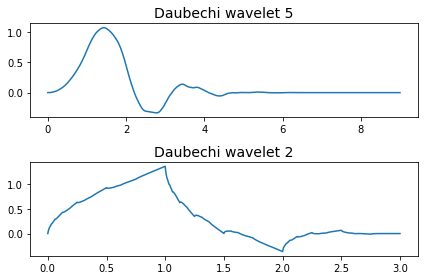

In [390]:
wavelet = pywt.Wavelet('db5')
w = wavelet.wavefun()
wavelet_function = w[0]
x_values = w[-1]
plt.subplot(211)
plt.plot(x_values, wavelet_function)
plt.title('Daubechi wavelet 5', fontsize=14)

wavelet = pywt.Wavelet('db2')
w = wavelet.wavefun()
wavelet_function = w[0]
x_values = w[-1]
plt.subplot(212)
plt.plot(x_values, wavelet_function)
plt.title('Daubechi wavelet 2', fontsize=14)

plt.tight_layout()
plt.show()

Other frequently used mother wavelets.

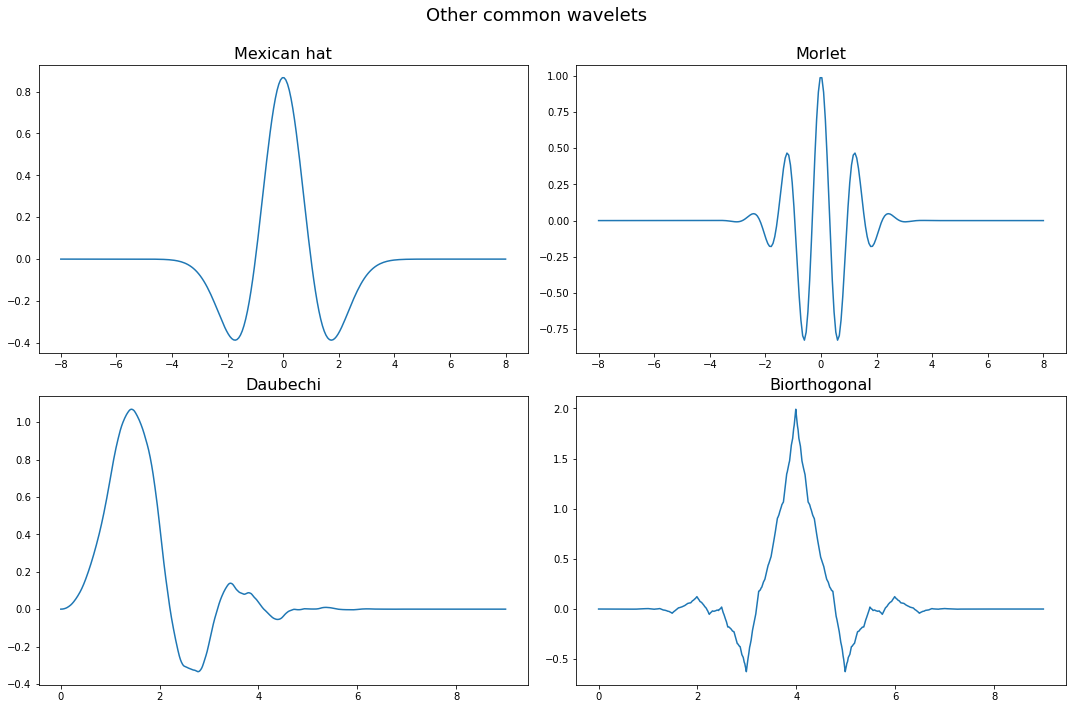

In [377]:
def plot(name, number, title):
    i = number // 2
    j = number % 2
    if i == 0:
        wavelet = pywt.ContinuousWavelet(name)
    else:
        wavelet = pywt.Wavelet(name)
    w = wavelet.wavefun()
    wavelet_function = w[0]
    x_values = w[-1]
    axis[i, j].set_title(title, fontsize=16)
    axis[i, j].plot(x_values, wavelet_function)

wavelets = ['mexh', 'morl', 'db5', 'bior2.4']
titles = ['Mexican hat', 'Morlet', 'Daubechi', 'Biorthogonal']

figure, axis = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
figure.suptitle('Other common wavelets', fontsize=18)

for i in range(len(titles)):
    plot(wavelets[i], i, titles[i])

figure.tight_layout()
figure.subplots_adjust(top=0.9)
plt.show()

### Example 15

Application of wavelet transform to real data of the temperature of the upper layer of the ocean used above.

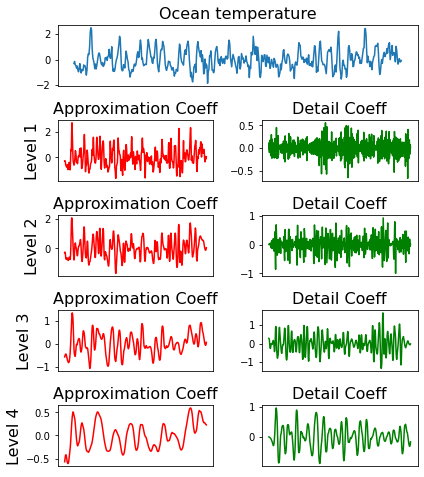

In [441]:
fig = plt.figure(figsize=(6,8))
spec = gridspec.GridSpec(ncols=2, nrows=6)
ax0 = fig.add_subplot(spec[0, 0:2])
ax1a = fig.add_subplot(spec[1, 0])
ax1b = fig.add_subplot(spec[1, 1])
ax2a = fig.add_subplot(spec[2, 0])
ax2b = fig.add_subplot(spec[2, 1])
ax3a = fig.add_subplot(spec[3, 0])
ax3b = fig.add_subplot(spec[3, 1])
ax4a = fig.add_subplot(spec[4, 0])
ax4b = fig.add_subplot(spec[4, 1])
axarr = np.array([[ax1a, ax1b],[ax2a, ax2b],[ax3a, ax3b],[ax4a, ax4b]])

data = "https://raw.githubusercontent.com/taspinar/siml/master/datasets/sst_nino3.dat.txt"
N = el_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
chirp_signal = el_nino.values.squeeze()

coefficients_level1 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=1)
coefficients_level2 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=2)
coefficients_level3 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=3)
coefficients_level4 = pywt.wavedec(chirp_signal, 'db5', 'smooth', level=4)


[cA1_l1, cD1_l1] = coefficients_level1
[cA2_l2, cD2_l2, cD1_l2] = coefficients_level2
[cA3_l3, cD3_l3, cD2_l3, cD1_l3] = coefficients_level3
[cA4_l4, cD4_l4, cD3_l4, cD2_l4, cD1_l4] = coefficients_level4


approx_coeff_level1_only = [cA1_l1, None]
detail_coeff_level1_only = [None, cD1_l1]

approx_coeff_level2_only = [cA2_l2, None, None]
detail_coeff_level2_only = [None, cD2_l2, None]

approx_coeff_level3_only = [cA3_l3, None, None, None]
detail_coeff_level3_only = [None, cD3_l3, None, None]

approx_coeff_level4_only = [cA4_l4, None, None, None, None]
detail_coeff_level4_only = [None, cD4_l4, None, None, None]


rec_signal_cA_level1 = pywt.waverec(approx_coeff_level1_only, 'db5', 'smooth')
rec_signal_cD_level1 = pywt.waverec(detail_coeff_level1_only, 'db5', 'smooth')

rec_signal_cA_level2 = pywt.waverec(approx_coeff_level2_only, 'db5', 'smooth')
rec_signal_cD_level2 = pywt.waverec(detail_coeff_level2_only, 'db5', 'smooth')

rec_signal_cA_level3 = pywt.waverec(approx_coeff_level3_only, 'db5', 'smooth')
rec_signal_cD_level3 = pywt.waverec(detail_coeff_level3_only, 'db5', 'smooth')

rec_signal_cA_level4 = pywt.waverec(approx_coeff_level4_only, 'db5', 'smooth')
rec_signal_cD_level4 = pywt.waverec(detail_coeff_level4_only, 'db5', 'smooth')


ax0.set_title("Ocean temperature", fontsize=16)
ax0.plot(time, chirp_signal)
ax0.set_xticks([])
ax1a.plot(rec_signal_cA_level1, color='red')
ax1b.plot(rec_signal_cD_level1, color='green')
ax2a.plot(rec_signal_cA_level2, color='red')
ax2b.plot(rec_signal_cD_level2, color='green')
ax3a.plot(rec_signal_cA_level3, color='red')
ax3b.plot(rec_signal_cD_level3, color='green')
ax4a.plot(rec_signal_cA_level4, color='red')
ax4b.plot(rec_signal_cD_level4, color='green')

for ii in range(0,4):
    axarr[ii,0].set_xticks([])
    axarr[ii,1].set_xticks([])
    axarr[ii,0].set_title("Approximation Coeff", fontsize=16)
    axarr[ii,1].set_title("Detail Coeff", fontsize=16)
    axarr[ii,0].set_ylabel("Level {}".format(ii+1), fontsize=16)
plt.tight_layout()
plt.show()

Let's apply Fourier transform to the low-frequency part at each level.

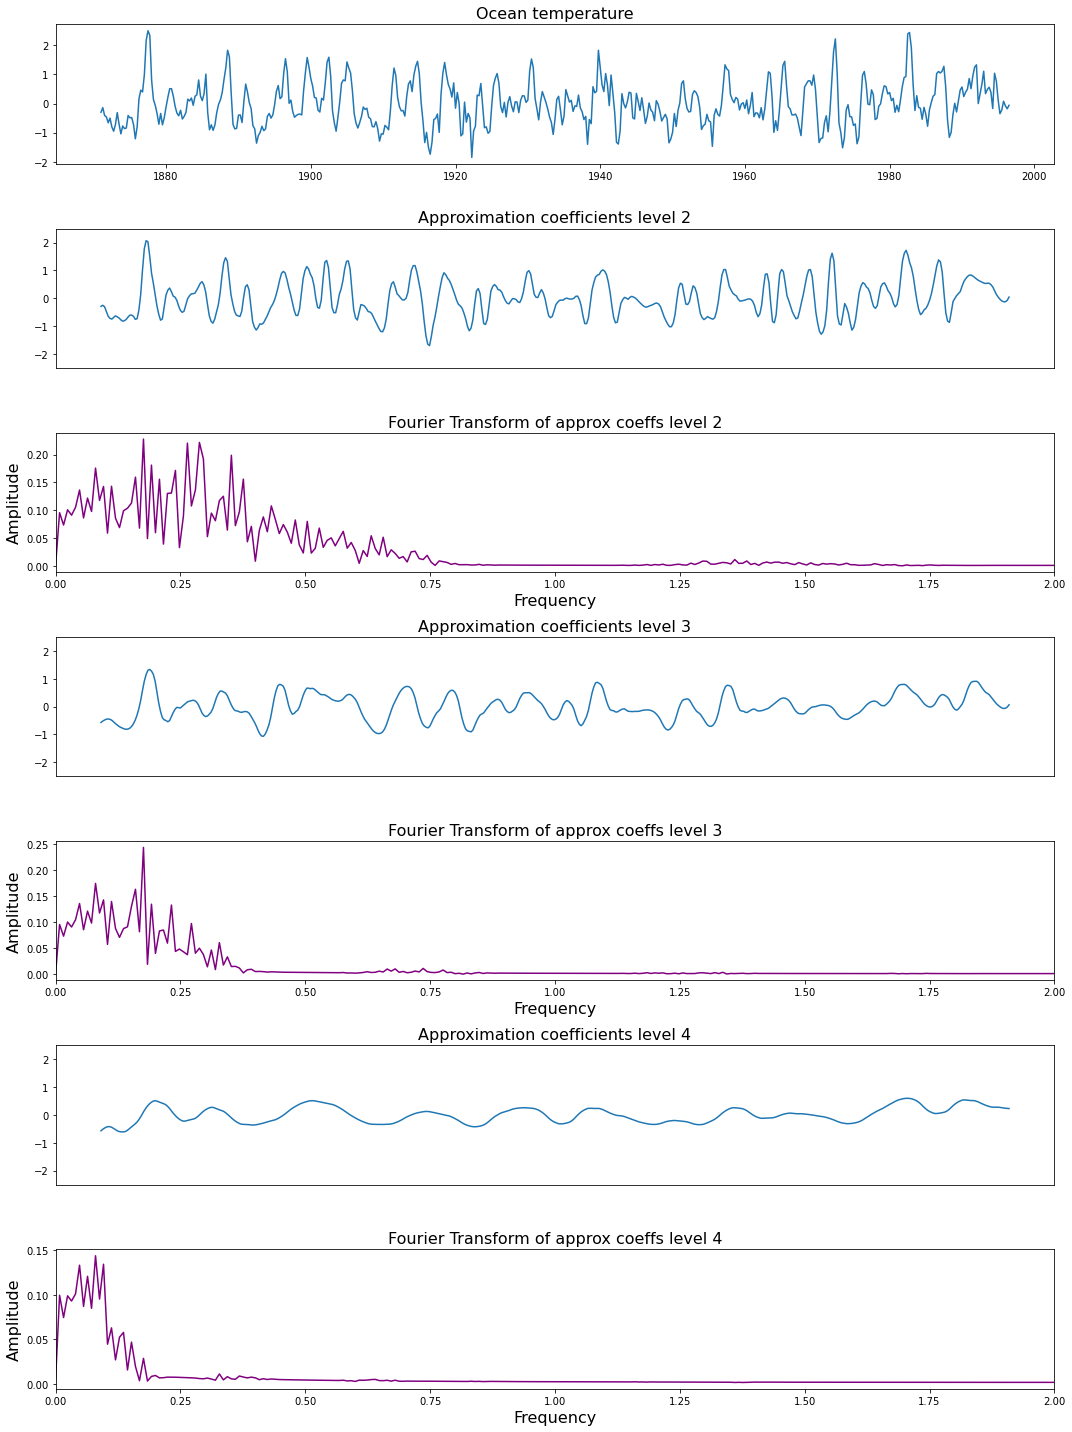

In [443]:
figure, axis = plt.subplots(7, 1, figsize=(15, 20))
plt.subplots_adjust(hspace=1.0)

wave0 = chirp_signal

axis[0].set_title('Ocean temperature', fontsize=16)
axis[0].plot(time, wave0)

signal = rec_signal_cA_level2

axis[1].set_title('Approximation coefficients level 2', fontsize=16)
axis[1].plot(signal)
axis[1].set_xticks([])
axis[1].set_ylim([-2.5, 2.5])

N = len(time)
dt = time[1]-time[0]
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis[2].plot(freqs, fft_values, 'purple')
axis[2].set_xlabel('Frequency', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)
axis[2].set_xlim([0, 2])
axis[2].set_title('Fourier Transform of approx coeffs level 2', fontsize=16)

signal = rec_signal_cA_level3

axis[3].set_title('Approximation coefficients level 3', fontsize=16)
axis[3].plot(signal)
axis[3].set_xticks([])
axis[3].set_ylim([-2.5, 2.5])

N = len(time)
dt = time[1]-time[0]
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis[4].plot(freqs, fft_values, 'purple')
axis[4].set_xlabel('Frequency', fontsize=16)
axis[4].set_ylabel('Amplitude', fontsize=16)
axis[4].set_xlim([0, 2])
axis[4].set_title('Fourier Transform of approx coeffs level 3', fontsize=16)

signal = rec_signal_cA_level4

axis[5].set_title('Approximation coefficients level 4', fontsize=16)
axis[5].plot(signal)
axis[5].set_xticks([])
axis[5].set_ylim([-2.5, 2.5])

N = len(time)
dt = time[1]-time[0]
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis[6].plot(freqs, fft_values, 'purple')
axis[6].set_xlabel('Frequency', fontsize=16)
axis[6].set_ylabel('Amplitude', fontsize=16)
axis[6].set_xlim([0, 2])
axis[6].set_title('Fourier Transform of approx coeffs level 4', fontsize=16)

plt.tight_layout()
plt.show()

These frequencies are not in Hz, because measurements were taken not every second but once in a quarter of a year.

***

With the help of PyWavelets package one can depict frequencies present in the signal at each moment as a spectrogram.

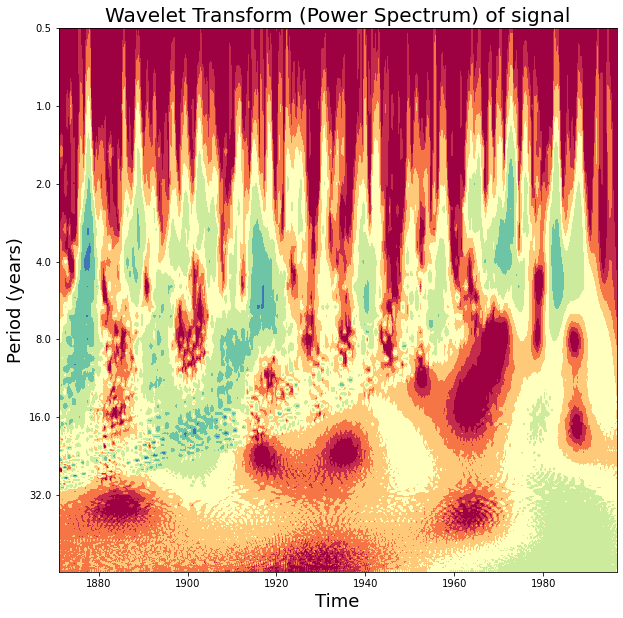

In [412]:
def plot_wavelet(ax, time, signal, scales, waveletname = 'cmor', 
                 cmap = plt.cm.Spectral, title = '', ylabel = '', xlabel = ''):
    
    dt = time[1] - time[0]
    [coefficients, frequencies] = pywt.cwt(signal, scales, waveletname, dt)
    power = (abs(coefficients)) ** 2
    period = 1. / frequencies
    levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
    contourlevels = np.log2(levels)
    
    im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, \
                     extend='both',cmap=cmap)
    
    ax.set_title(title, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=18)
    ax.set_xlabel(xlabel, fontsize=18)
    
    yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
    ax.set_yticks(np.log2(yticks))
    ax.set_yticklabels(yticks)
    ax.invert_yaxis()
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], -1)
    return yticks, ylim

data = "https://raw.githubusercontent.com/taspinar/siml/master/datasets/sst_nino3.dat.txt"
el_nino = pd.read_table(data)
N = el_nino.shape[0]
t0=1871
dt=0.25
time = np.arange(0, N) * dt + t0
signal = el_nino.values.squeeze()

scales = np.arange(1, 128)
title = 'Wavelet Transform (Power Spectrum) of signal'
ylabel = 'Period (years)'
xlabel = 'Time'

fig, ax = plt.subplots(figsize=(10, 10))
plot_wavelet(ax, time, signal, scales, xlabel=xlabel, ylabel=ylabel, title=title)
plt.show()

Для применения Вейвлет-анализа к практической задаче нужно понимать, какие информативные частотные диапазоны нужно выделять в сигнале, исходя из физического смысла. Чтобы правильно выделить эти частоты, необходимо правильно выбрать форму вейвлета и количество уровней декомпозиции.

## EMD

For EMD-analysis a package called emd was used.

### Example 16

An example from the package documentation - empirical mode decomposition of a sum of sinusoids (into IMF - intrinsic mode functions).

In [222]:
import emd

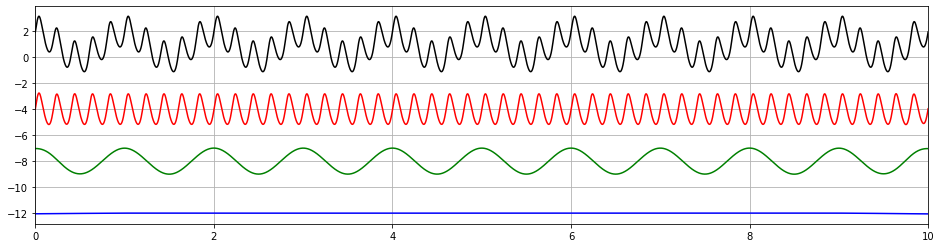

In [446]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

freq = 5
nonlinearity_deg = .25  # change extent of deformation from sinusoidal shape [-1 to 1]
nonlinearity_phi = -np.pi/4  # change left-right skew of deformation [-pi to pi]
x = emd.utils.abreu2010(freq, nonlinearity_deg, nonlinearity_phi, sample_rate, seconds)
x += np.cos(2*np.pi*1*time_vect)

imf = emd.sift.sift(x)

IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 10, 100)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

plt.figure(figsize=(16, 4))
plt.plot(time_vect, x, 'k')
plt.plot(time_vect, imf[:, 0]-4, 'r')
plt.plot(time_vect, imf[:, 1]-8, 'g')
plt.plot(time_vect, imf[:, 2]-12, 'b')
plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)
plt.show()

### Example 17

Decomposition of a sum of sinusoids with frequencies 3 and 7 into a sum of IMFs.

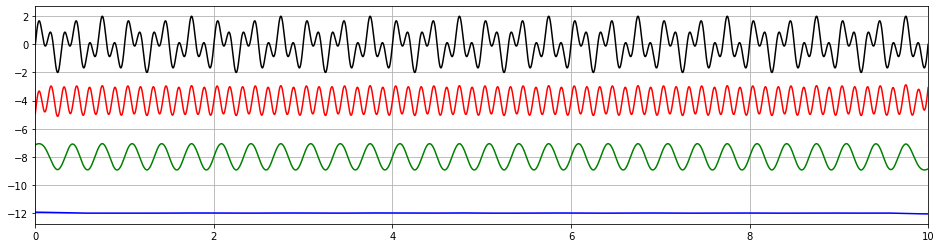

In [448]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

x = np.sin(2 * np.pi * 3 * time_vect) + np.sin(2 * np.pi * 7 * time_vect)

imf = emd.sift.sift(x)

IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 10, 100)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

plt.figure(figsize=(16, 4))
plt.plot(time_vect, x, 'k')
plt.plot(time_vect, imf[:, 0]-4, 'r')
plt.plot(time_vect, imf[:, 1]-8, 'g')
plt.plot(time_vect, imf[:, 2]-12, 'b')
plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)
plt.show()

### Example 18

Decomposition of a sum of sinusoids with frequencies 3 and 7 with noise into a sum of IMFs.

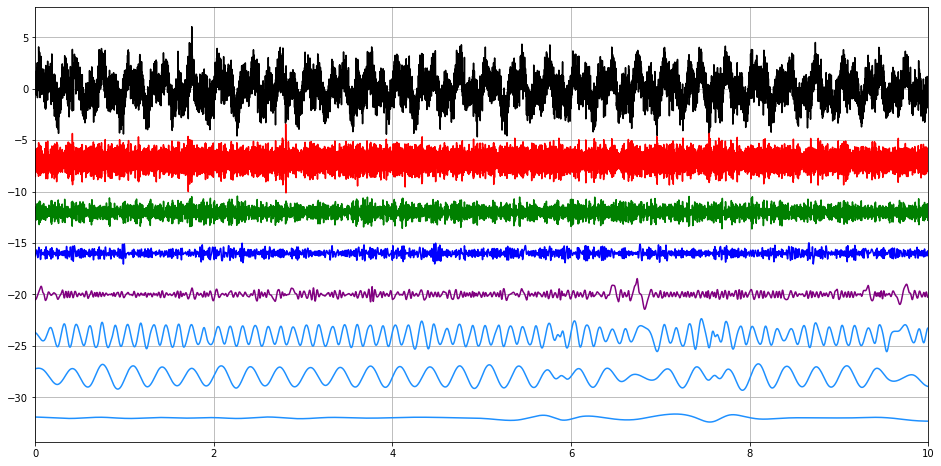

In [434]:
sample_rate = 1000
seconds = 10
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

x = np.sin(2 * np.pi * 3 * time_vect) + np.sin(2 * np.pi * 7 * time_vect) + np.random.normal(0, 1, time_vect.shape)

imf = emd.sift.sift(x)

IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 10, 100)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

plt.figure(figsize=(16, 8))
plt.plot(time_vect, x, 'k')
plt.plot(time_vect, imf[:, 0]-7, 'r')
plt.plot(time_vect, imf[:, 1]-12, 'g')
plt.plot(time_vect, imf[:, 2]-16, 'b')
plt.plot(time_vect, imf[:, 3]-20, 'purple')
plt.plot(time_vect, imf[:, 4]-24, 'dodgerblue')
plt.plot(time_vect, imf[:, 5]-28, 'dodgerblue')
plt.plot(time_vect, imf[:, 6]-32, 'dodgerblue')

plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)

plt.show()

To reconstruct the original signal without noise one can add the last three IMFs.

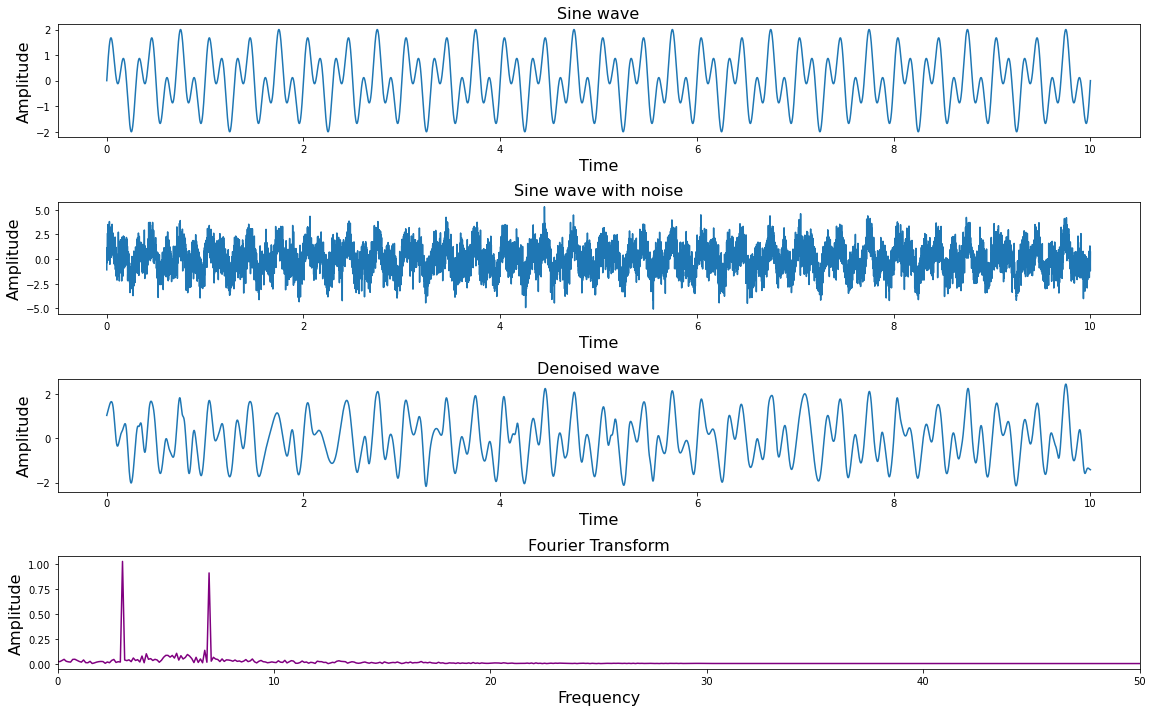

In [421]:
x0 = np.sin(2 * np.pi * 3 * time_vect) + np.sin(2 * np.pi * 7 * time_vect)

figure, axis = plt.subplots(4, 1, figsize=(16, 10))
plt.subplots_adjust(hspace=1.0)

axis[0].set_title('Sine wave', fontsize=16)
axis[0].plot(time_vect, x0)
axis[0].set_xlabel('Time', fontsize=16)
axis[0].set_ylabel('Amplitude', fontsize=16)

axis[1].set_title('Sine wave with noise', fontsize=16)
axis[1].plot(time_vect, x)
axis[1].set_xlabel('Time', fontsize=16)
axis[1].set_ylabel('Amplitude', fontsize=16)

axis[2].set_title('Denoised wave', fontsize=16)
axis[2].plot(time_vect, imf[:, 4] + imf[:, 5] + imf[:, 6])
axis[2].set_xlabel('Time', fontsize=16)
axis[2].set_ylabel('Amplitude', fontsize=16)

signal = imf[:, 4] + imf[:, 5] + imf[:, 6]
N = len(time_vect)
dt = time_vect[1]-time_vect[0]
freqs = np.linspace(0.0, 1.0 / (2.0 * dt), N // 2)
fourierTransform = fft(signal)
fft_values = 2.0 / N * np.abs(fourierTransform[0 : N // 2])
axis[3].plot(freqs, fft_values, 'purple')
axis[3].set_xlabel('Frequency', fontsize=16)
axis[3].set_ylabel('Amplitude', fontsize=16)
axis[3].set_xlim([0, 50])
axis[3].set_title('Fourier Transform', fontsize=16)

plt.tight_layout()
plt.show()

### Example 19

Decomposition of a signal with increasing frequency into a sum of IMFs.

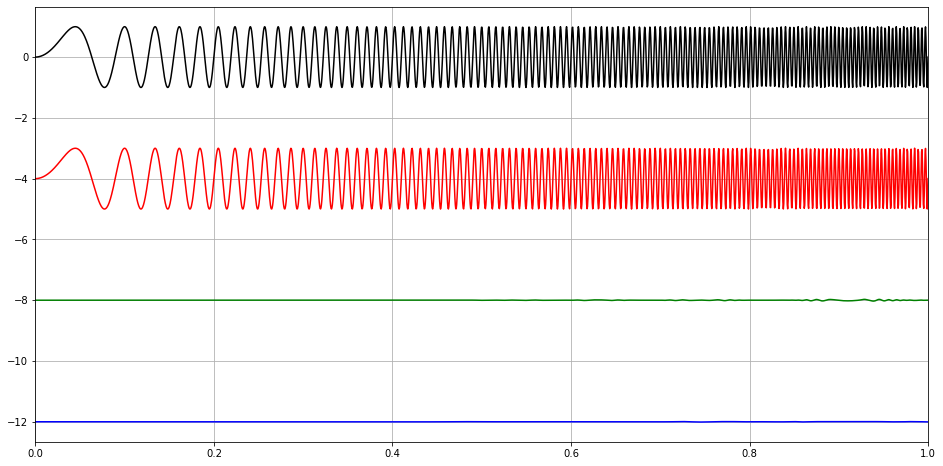

In [422]:
sample_rate = 2048
seconds = 1
num_samples = sample_rate*seconds

time_vect = np.linspace(0, seconds, num_samples)

x = np.sin(250 * np.pi * time_vect**2)

imf = emd.sift.sift(x)

IP, IF, IA = emd.spectra.frequency_transform(imf, sample_rate, 'hilbert')

freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 10, 100)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

plt.figure(figsize=(16, 8))
plt.plot(time_vect, x, 'k')
plt.plot(time_vect, imf[:, 0]-4, 'r')
plt.plot(time_vect, imf[:, 1]-8, 'g')
plt.plot(time_vect, imf[:, 2]-12, 'b')
plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)
plt.show()

### Example 20

Decomposition of a real signal - data of the temperature of the upper layer of the ocean - into a sum of IMFs.

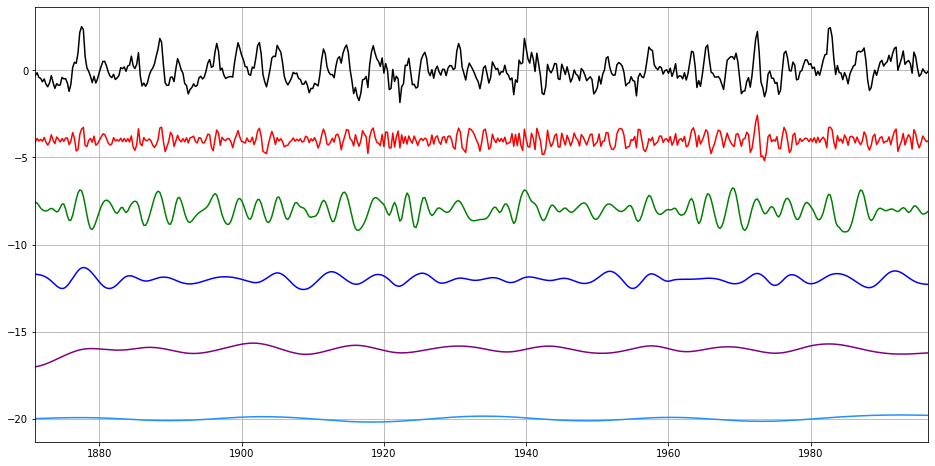

In [258]:
data = "https://raw.githubusercontent.com/taspinar/siml/master/datasets/sst_nino3.dat.txt"
el_nino = pd.read_table(data)
N = el_nino.shape[0]
t0=1871
dt=0.25
time_vect = np.arange(0, N) * dt + t0
x = el_nino.values.squeeze()

imf = emd.sift.sift(x)

IP, IF, IA = emd.spectra.frequency_transform(imf, dt, 'hilbert')

freq_edges, freq_bins = emd.spectra.define_hist_bins(0, 0.2, 2)
hht = emd.spectra.hilberthuang(IF, IA, freq_edges)

plt.figure(figsize=(16, 8))
plt.plot(time_vect, x, 'k')
plt.plot(time_vect, imf[:, 0]-4, 'r')
plt.plot(time_vect, imf[:, 1]-8, 'g')
plt.plot(time_vect, imf[:, 2]-12, 'b')
plt.plot(time_vect, imf[:, 3]-16, 'purple')
plt.plot(time_vect, imf[:, 4]-20, 'dodgerblue')
plt.xlim(time_vect[0], time_vect[-1])
plt.grid(True)
plt.show()